In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
suicide_statistic = pd.read_csv('dados/who_suicide_statistics.csv')

In [3]:
suicide_statistic.head(10)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [4]:
suicide_statistic.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [6]:
suicide_statistic['population'] = suicide_statistic.groupby(['country', 'sex', 'age'])['population'].transform(
    lambda x: x.fillna(x.mean())
)

In [7]:
suicide_statistic['population'].isnull().sum()

3768

In [8]:
suicide_statistic['suicides_no'] = suicide_statistic.groupby(['country', 'sex', 'age'])['suicides_no'].transform(
    lambda x: x.fillna(x.mean())
)

In [9]:
suicide_statistic['suicides_no'].isnull().sum()

0

In [10]:
suicide_statistic.head(100)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,11.500000,277900.0
1,Albania,1985,female,25-34 years,6.318182,246800.0
2,Albania,1985,female,35-54 years,7.863636,267500.0
3,Albania,1985,female,5-14 years,0.954545,298300.0
4,Albania,1985,female,55-74 years,3.090909,138700.0
...,...,...,...,...,...,...
95,Albania,1992,male,75+ years,0.000000,23900.0
96,Albania,1993,female,15-24 years,10.000000,285300.0
97,Albania,1993,female,25-34 years,7.000000,261800.0
98,Albania,1993,female,35-54 years,7.000000,331200.0


In [11]:
suicide_statistic.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no       0
population     3768
dtype: int64

In [16]:
suicide_statistic['population'] = suicide_statistic.groupby(['country', 'sex'])['population'].transform(
    lambda x: x.fillna(x.mean())
)

In [19]:
suicide_statistic['population'].isnull().sum()

3768

In [20]:
import seaborn as sns

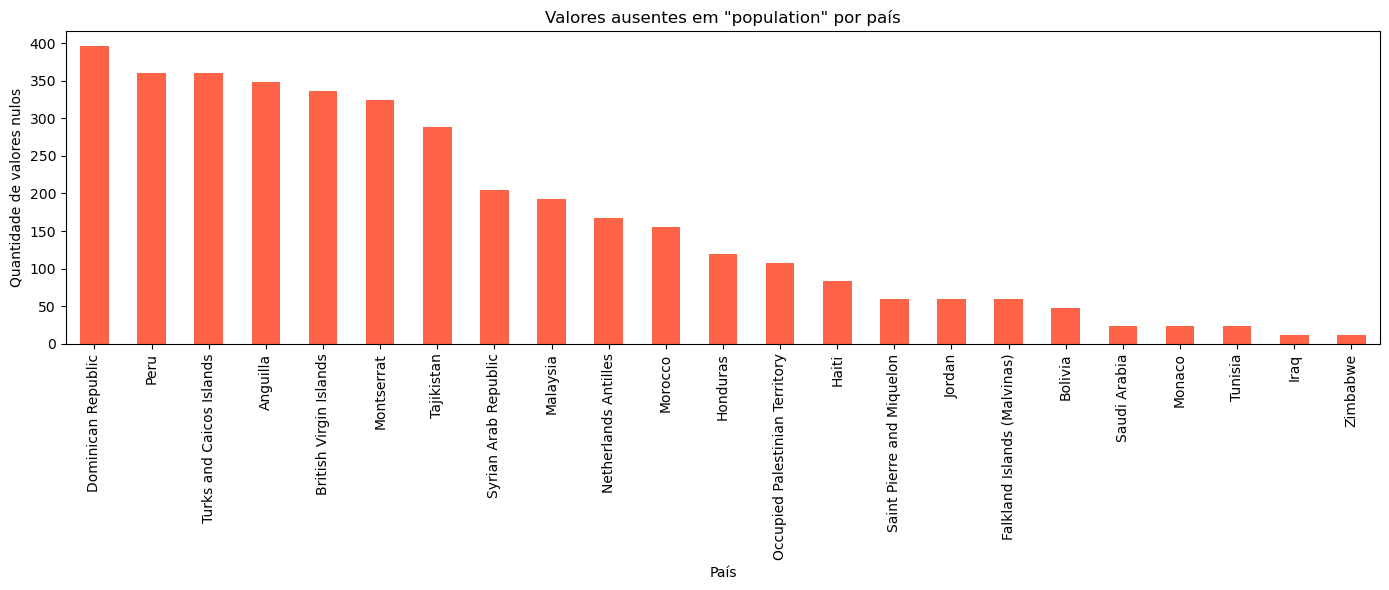

In [26]:
missing_by_country = suicide_statistic[suicide_statistic['population'].isnull()]['country'].value_counts()

missing_by_country.plot(kind='bar', figsize=(14, 6), color='tomato')
plt.title('Valores ausentes em "population" por país')
plt.ylabel('Quantidade de valores nulos')
plt.xlabel('País')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [33]:
pop_country_mean = suicide_statistic.groupby('country')['population'].mean()

In [34]:
suicide_statistic['population'] = suicide_statistic.apply(
    lambda row: pop_country_mean[row['country']] if pd.isnull(row['population']) else row['population'],
    axis=1
)

In [35]:
suicide_statistic['population'].isnull().sum()

3768

In [36]:
pop_country_mean['Dominican Republic']

nan

In [40]:
pop_country_mean[pop_country_mean.isnull()]

country
Anguilla                         NaN
Bolivia                          NaN
British Virgin Islands           NaN
Dominican Republic               NaN
Falkland Islands (Malvinas)      NaN
Haiti                            NaN
Honduras                         NaN
Iraq                             NaN
Jordan                           NaN
Malaysia                         NaN
Monaco                           NaN
Montserrat                       NaN
Morocco                          NaN
Netherlands Antilles             NaN
Occupied Palestinian Territory   NaN
Peru                             NaN
Saint Pierre and Miquelon        NaN
Saudi Arabia                     NaN
Syrian Arab Republic             NaN
Tajikistan                       NaN
Tunisia                          NaN
Turks and Caicos Islands         NaN
Zimbabwe                         NaN
Name: population, dtype: float64

In [42]:
missing_by_country = suicide_statistic[suicide_statistic['population'].isnull()]['country'].value_counts()

In [43]:
missing_by_country

country
Dominican Republic                396
Peru                              360
Turks and Caicos Islands          360
Anguilla                          348
British Virgin Islands            336
Montserrat                        324
Tajikistan                        288
Syrian Arab Republic              204
Malaysia                          192
Netherlands Antilles              168
Morocco                           156
Honduras                          120
Occupied Palestinian Territory    108
Haiti                              84
Saint Pierre and Miquelon          60
Jordan                             60
Falkland Islands (Malvinas)        60
Bolivia                            48
Saudi Arabia                       24
Monaco                             24
Tunisia                            24
Iraq                               12
Zimbabwe                           12
Name: count, dtype: int64

In [48]:
countries_with_all_na = missing_by_country[missing_by_country == len(suicide_statistic[suicide_statistic['country'] == missing_by_country.index[0]])].index

In [49]:
df_cleaned = suicide_statistic[~suicide_statistic['country'].isin(countries_with_all_na)]


In [50]:
df_cleaned['population'].isnull().sum()

3372

In [52]:
partial_missing_by_country = suicide_statistic[suicide_statistic['population'].isnull()]['country'].value_counts()

In [60]:
partial_missing_by_country

country
Dominican Republic                396
Peru                              360
Turks and Caicos Islands          360
Anguilla                          348
British Virgin Islands            336
Montserrat                        324
Tajikistan                        288
Syrian Arab Republic              204
Malaysia                          192
Netherlands Antilles              168
Morocco                           156
Honduras                          120
Occupied Palestinian Territory    108
Haiti                              84
Saint Pierre and Miquelon          60
Jordan                             60
Falkland Islands (Malvinas)        60
Bolivia                            48
Saudi Arabia                       24
Monaco                             24
Tunisia                            24
Iraq                               12
Zimbabwe                           12
Name: count, dtype: int64

In [62]:
df_cleaned['population'].isnull().sum()

3372

In [63]:
df_cleaned[df_cleaned['country'] == 'Dominican Republic']

,country,year,sex,age,suicides_no,population


In [64]:
df_cleaned.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,11.500000,277900.0
1,Albania,1985,female,25-34 years,6.318182,246800.0
2,Albania,1985,female,35-54 years,7.863636,267500.0
3,Albania,1985,female,5-14 years,0.954545,298300.0
4,Albania,1985,female,55-74 years,3.090909,138700.0


In [67]:
df_cleaned = df_cleaned[df_cleaned['population'].notnull()]

In [68]:
df_cleaned['population'].isnull().sum()

0

In [69]:
df_cleaned.to_csv('dados/suicide_statistic_limpo_corrigido.csv', index=False)